# CURSO DEEPLEARNIG EN DATACAMP

#### Creating the NN

In [2]:
import numpy as np

input_data = np.array([3,5])

weights = {'node_0':[2,4], 'node_1':[4,-5], 'output':[2,7]}

print(weights['node_0'], weights['node_1'], weights['output'])

[2, 4] [4, -5] [2, 7]


In [4]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


#### Implementing the ReLU activation fucntion

In [5]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [6]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


#### Implementing the ReLU activation fucntion in a set of NN

In [13]:
input_data = np.array([3,5])
weights = {'node_0_0':[2,4], 'node_0_1':[4,-5], 'node_1_0':[-1,2], 'node_1_1':[1,2],'output':[2,7]}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


# Updating the weights

In [3]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)
###############################################################

NameError: name 'predict_with_network' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

# Create model_output_0
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row,weights_0))
   
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

############################################################

# Updating the weights with Gradient descent

In [ ]:
SLOPE CALCULATION - NEW WEIGHTS - GRADIENT DESCENT:

input_node = 3 , weight= 2, predicted = 6 , target= 10, error = -4

*gradient = 2  * (input data) * error

* weights_update: weights - learning_rate * gradient -> 2 - 0.01 * (-24) = 2.24  

* preds_updated = (weights_update * input_data ).sum()

*error_updated =  preds_updated - target

# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)


In [ ]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (input_data * weights_updated).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

###############################################################

In [ ]:
n_updates = 20
mse_hist = []
learning_rate = 0.01

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
   
    # Update the weights: weights
    weights = weights - learning_rate * slope
   
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
   
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Implementing a model using KERAS

ESPECIFYING THE MODEL

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))


COMPILE THE MODEL

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

FITTING THE MODEL

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

# Clasification Models

In [ ]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)  #similar to one-hot encoding

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)


# Save, reloading and using a model

In [ ]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1] #column corresponding to predicted probabilities 

# print predicted_prob_true
print(predicted_prob_true)

# Changing optimization parameters

In [ ]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer =  SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target)

# Model validation

In [ ]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=(0.3))

# Early Optimization 

early stopping is used to stop optimization when it isn't helping any more.

In [ ]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=(0.3), callbacks=[early_stopping_monitor])


In [ ]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


# Adding layers to a network

In [ ]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


# Building your own digit recognition model

In [216]:
# Import necessary modules
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [209]:
#Loading the datasets
from keras.datasets import mnist

image_size = 28
num_images = 60000

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [166]:
#from mnist import MNIST

#mndata = MNIST('C:/Users/Usuario/OneDrive - Idata/IDATA/Aprendiendo_python/samples/') 

#images_train, labels_train = mndata.load_training()
# or
#images, labels = mndata.load_testing()

#from mlxtend.data import loadlocal_mnist
#X, y = loadlocal_mnist(
#        images_path='C:/Users/Usuario/Escritorio/train-images-idx3-ubyte', 
#        labels_path='C:/Users/Usuario/Escritorio/train-labels-idx1-ubyte')

In [190]:
#loading the datasets

#import gzip
#train_img = gzip.open('C:/Users/Usuario/OneDrive - Idata/IDATA/Aprendiendo_python/samples/train-images-idx3-ubyte.gz','r')
#train_lab = gzip.open('C:/Users/Usuario/OneDrive - Idata/IDATA/Aprendiendo_python/samples/train-labels-idx1-ubyte.gz','r')

#image_size = 28
#num_images = 5

#train_img.read(16)
#buf = train_img.read(image_size * image_size * num_images)
#X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
#X_train = X_train.reshape(num_images, image_size, image_size, 1)

#train_lab.read(8)
#buf2 = train_lab.read(num_images) #image_size * image_size * 1
#y_train = np.frombuffer(buf2, dtype=np.uint8).astype(np.int64)
#y_train = y_train.reshape(1, image_size*image_size)


In [198]:
#buff = train_img.read(image_size * image_size * num_images)
#X = np.frombuffer(buff, dtype=np.uint8, count=-1).astype(np.float32)
#X_train = X_train.reshape(num_images, image_size, image_size, 1)

#buff2 = train_lab.read(1)
#y_train = np.frombuffer(buf, dtype=np.uint8, count=-1).astype(np.int64)


In [202]:
#train_lab.read(8)
#for i in range(0,50):   
#    buf = train_lab.read(1)
#    y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#    print(y_train)

In [205]:
print(type(X_train))
print(type(y_train))
print("X_train size:",X_train.shape)
print("y_train size:",y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train size: (60000, 28, 28)
y_train size: (60000,)


In [214]:
type(X_train)

numpy.ndarray

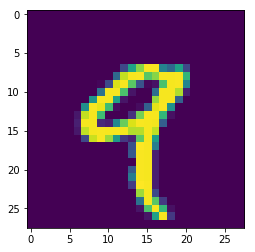

In [206]:
#### Displaying the content of X_train

import matplotlib.pyplot as plt
image = np.asarray(X_train[4]).squeeze()
plt.imshow(image)
plt.show()

In [210]:
#flattening the matrix X
def prep_data(X_train,y_train):
    out_x=np.zeros((num_images,image_size*image_size))
    
    out_y = keras.utils.to_categorical(y_train, num_images)
    
    for i in range(num_images):
        out_x[i] = X_train[i].reshape(1,image_size*image_size)
    return out_x, out_y

In [211]:
X, y = prep_data(X_train,y_train)
print("X size:",X.shape)
print("y size:",y.shape)

X size: (60000, 784)
y size: (60000, 60000)


In [212]:
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [230]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(image_size*image_size, )))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(num_images, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
batch_size = 10000
epochs = 6
model.fit(X, y, validation_split=0.3) #callbacks=[early_stopping_monitor] batch_size=batch_size, epochs=epochs,


Train on 42000 samples, validate on 18000 samples
Epoch 1/1
42000/42000 [==============================] - 445s 11ms/step - loss: 0.3860 - acc: 0.8909 - val_loss: 0.2904 - val_acc: 0.9209


# Testing and evaluating the model

In [235]:
#Evaluating the model
model.evaluate(X, y)

X_t size: (10000, 784)
y_t size: (10000, 10000)
60000/60000 [==============================] - 190s 3ms/step


[0.24598497088526686, 0.92945]

In [238]:
print("X_test size:",X_test.shape)
print("y_test size:",y_test.shape)

X_test size: (10000, 28, 28)
y_test size: (10000,)


In [239]:
#Predicting with the model

#flattening the matrix X
def prep_data2(X,y):
    out_x=np.zeros((10000,image_size*image_size))
    
    out_y = keras.utils.to_categorical(y, 10000)
    
    for i in range(10000):
        out_x[i] = X[i].reshape(1,image_size*image_size)
    return out_x, out_y

X_t, y_t = prep_data2(X_test,y_test)

print("X_t size:",X_t.shape)
print("y_t size:",y_t.shape)

MemoryError: Unable to allocate array with shape (10000, 10000) and data type float32

In [ ]:
#Testing the model
model.predict(X_t, y_t)

X_t size: (10000, 784)
y_t size: (10000, 10000)
20928/60000 [=========>....................] - ETA: 1:56